In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('../../data/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Example 1

Let's say we want to know if a pokemon's offensive stats are biased towards physical or special-attack if their defensive stats are similarly biased towards physical or special-defense.

To determine whether a pokemon is biased toward attack or special-attack and defense or special-defense, we will first compute the ratio of those separately. Then, to determine if there is a positive correlation between those values, we can take the ratio of the ratios and plot those values.

In [22]:
df['attack-ratio'] = df['attack'] / df['special-attack']
df['defense-ratio'] = df['defense'] / df['special-defense']

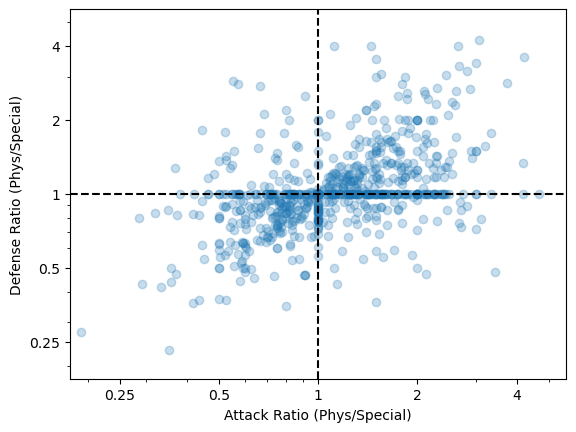

In [23]:
sns.regplot(x='attack-ratio', y='defense-ratio', data=df, fit_reg=False, scatter_kws={'alpha':0.25})
plt.xlabel('Attack Ratio (Phys/Special)')
plt.ylabel('Defense Ratio (Phys/Special)')

plt.xscale('log')
plt.yscale('log')

ticks = [0.25, 0.5, 1, 2, 4]
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5)

# Add lines for equal ratios
plt.axhline(1, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')

From this we can see that their does seem to be a greater proportion of points in the top right and bottom left quadrants suggesting a positive correlation between the ratios of attack and defense. Thus, if a pokemon has a small physical-special to attack ratio then it is likely to have a small physical-special defense ratio.

Furthermore, it appears that many pokemon don't have a bias for their physical-special defense ratio but a broad attack ratio in those scenarios. The same is not true from the attack perspective (small vertical at attack ration = 1 and defense ratio < 1).

### Example 2



In [24]:
df = pd.read_csv('../../data/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

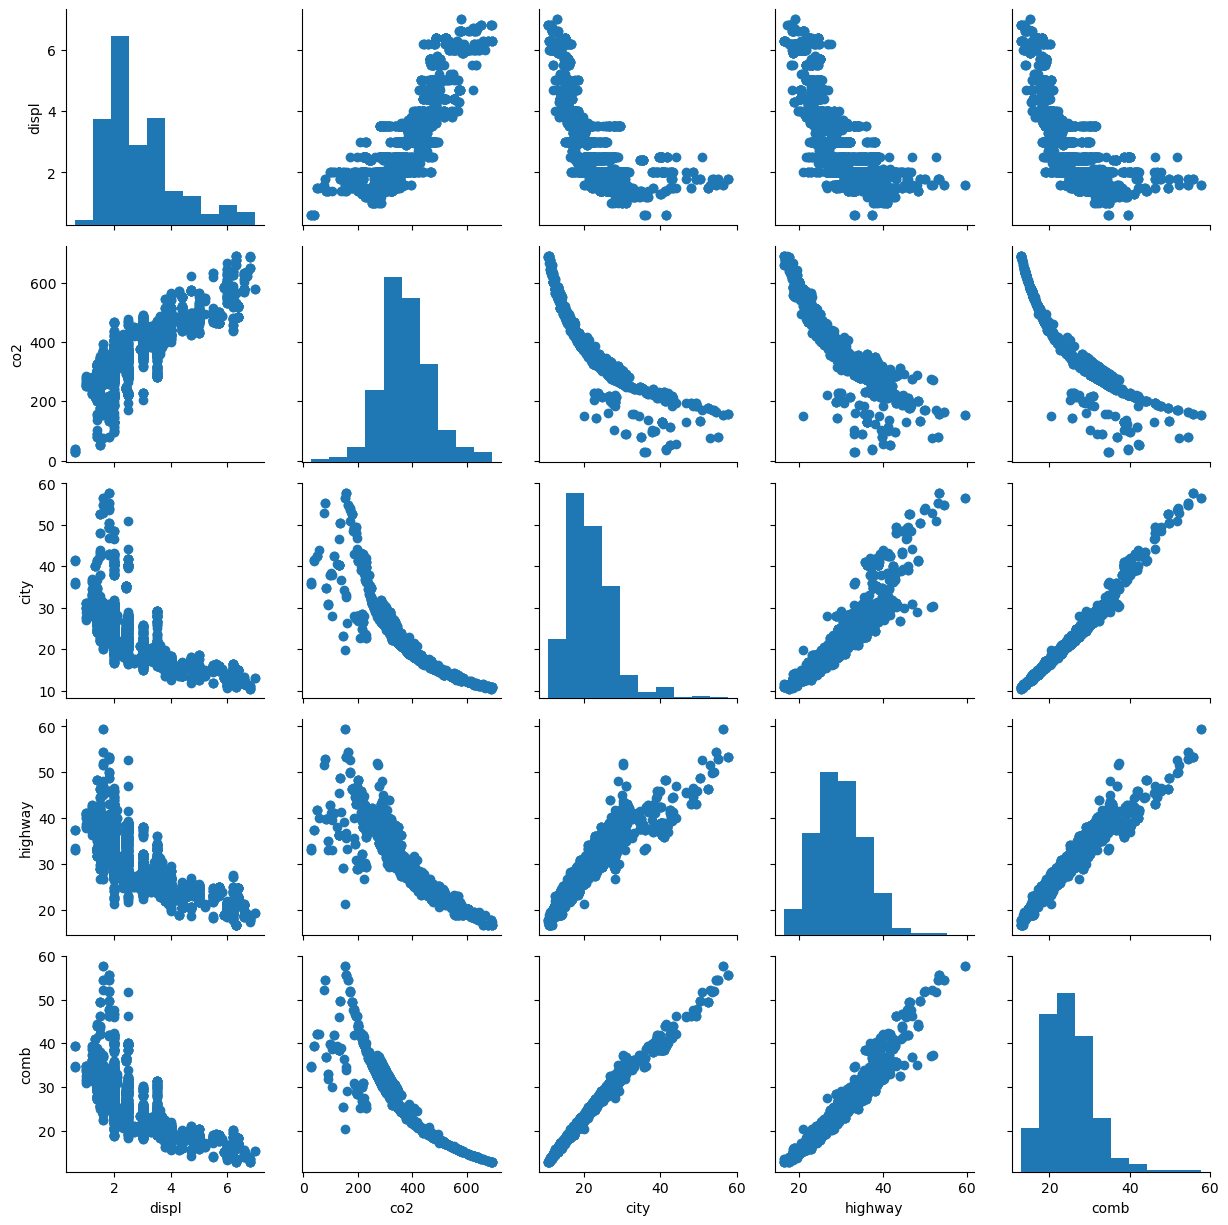

In [25]:
g = sns.PairGrid(df[['displ', 'co2', 'city', 'highway', 'comb']])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

<Figure size 2000x500 with 0 Axes>

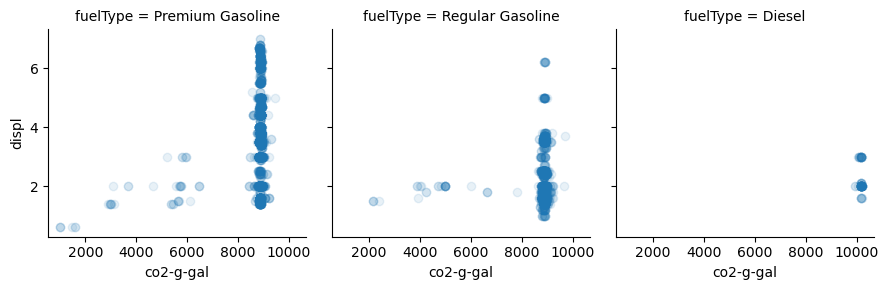

In [28]:
plt.figure(figsize=[20, 5])
df['co2-g-gal'] = df['co2'] * df['comb']
df_sub = df.loc[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])][['displ', 'fuelType', 'co2-g-gal']]
g = sns.FacetGrid(data=df_sub, col='fuelType')
g.map(plt.scatter, 'co2-g-gal', 'displ', alpha=0.1);